In [53]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

# Гипотезы

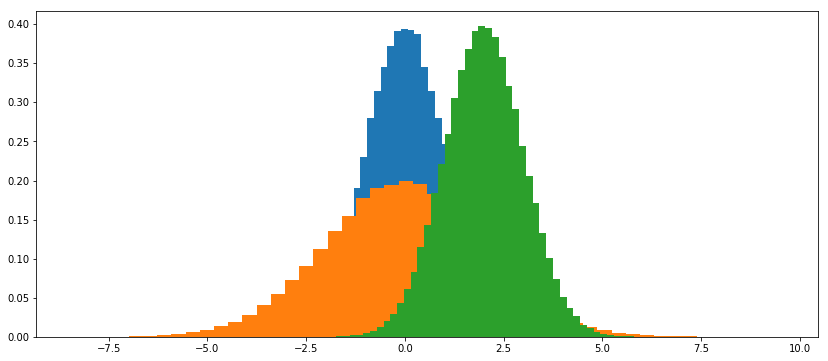

In [56]:
from scipy.stats import norm
number_of_samples =  100000
plt.figure(figsize = (14,6))
for mean, std in [(0,1),(0,2),(2,1)]:
    plt.hist(norm.rvs(loc=mean, scale=std, size=number_of_samples), bins = 50, density=True)
plt.show()

We can not reget or accept hypothesis


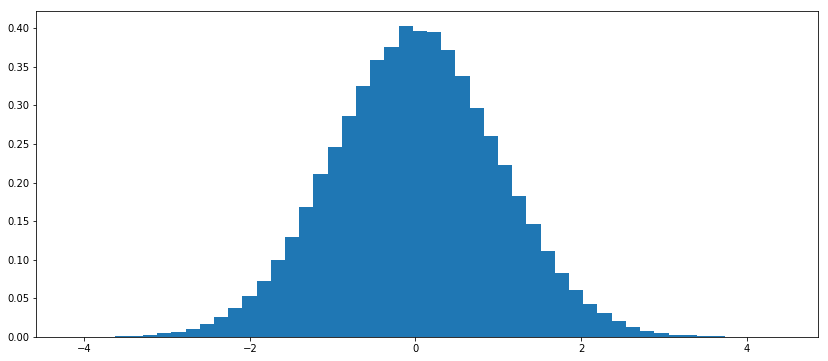

In [57]:

number_of_samples =  100000
mean = 0
std = 1


observed_value = 1
p_value = min(1 - norm.cdf(observed_value), norm.cdf(observed_value))
significance = 0.05
if p_value<significance:
    print('Reget hypothesis')
else:
    print('We can not reget or accept hypothesis')


sample = norm.rvs(loc=mean, scale=std, size=number_of_samples)
plt.figure(figsize = (14,6))
plt.hist(sample, bins = 50, density=True)
plt.show()

# Линейная регрессия

$$y = \alpha + \beta_1x_1 + \beta_2x_2+...+\beta_nx_n + \varepsilon$$

$$MSE = \sum (y_i - \overline y )^2$$

## Сгенерированные данные

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sat, 14 Apr 2018   Prob (F-statistic):           8.37e-43
Time:                        22:28:25   Log-Likelihood:                -358.14
No. Observations:                 250   AIC:                             722.3
Df Residuals:                     247   BIC:                             732.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9856      0.065     15.214      0.0

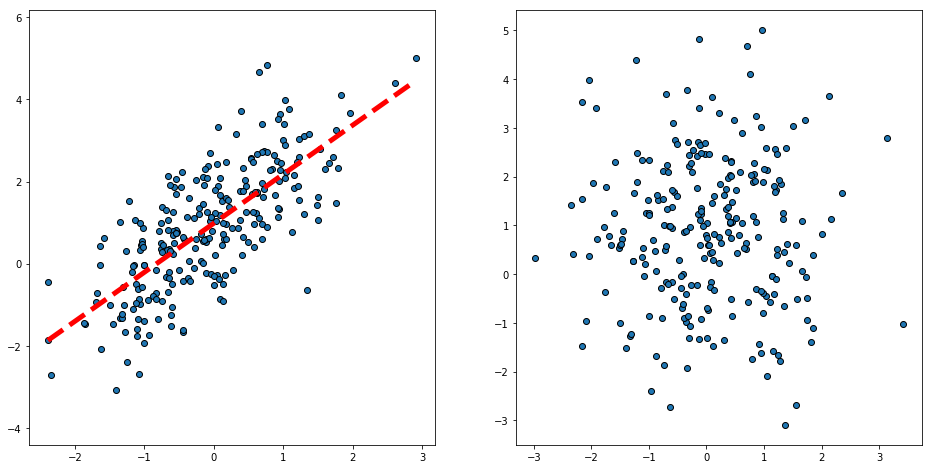

In [58]:
import statsmodels.api as sm
from scipy import stats
from numpy.random import normal

np.random.seed(67)

number_of_samples = 250


X1 = normal(loc=0.0, scale=1, size=number_of_samples)
X2 = normal(loc=0.0, scale=1, size=number_of_samples)

noise = normal(loc=0.0, scale=1, size=number_of_samples)

Y = 1 + 1.2 *X1 + +0*X2 + noise

## Adding noise for variables
X1 += normal(loc=0.0, scale=0, size=number_of_samples)
X2 += normal(loc=0.0, scale=0, size=number_of_samples)


X = np.column_stack([X1, X2])
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

x_axis = np.arange(min(X1),max(X1), 0.1)
step = max(X1) - min(X1)
ax1.scatter(X1,Y, edgecolors=(0, 0, 0))
ax1.plot(x_axis, results.params[0] + results.params[1] * x_axis,'k--', lw = 5, c='red')
ax1.set_ylim(np.mean(Y)-step, np.mean(Y)+step)

ax2.scatter(X2,Y, edgecolors=(0, 0, 0))

## Overfit

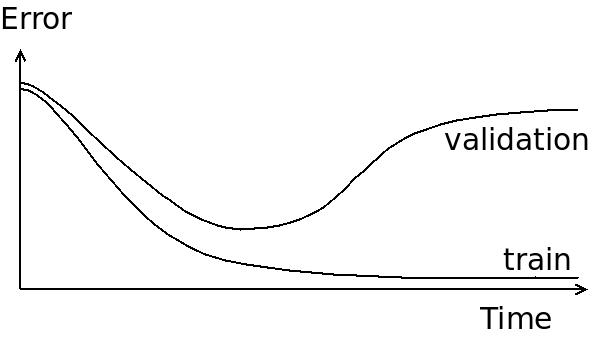

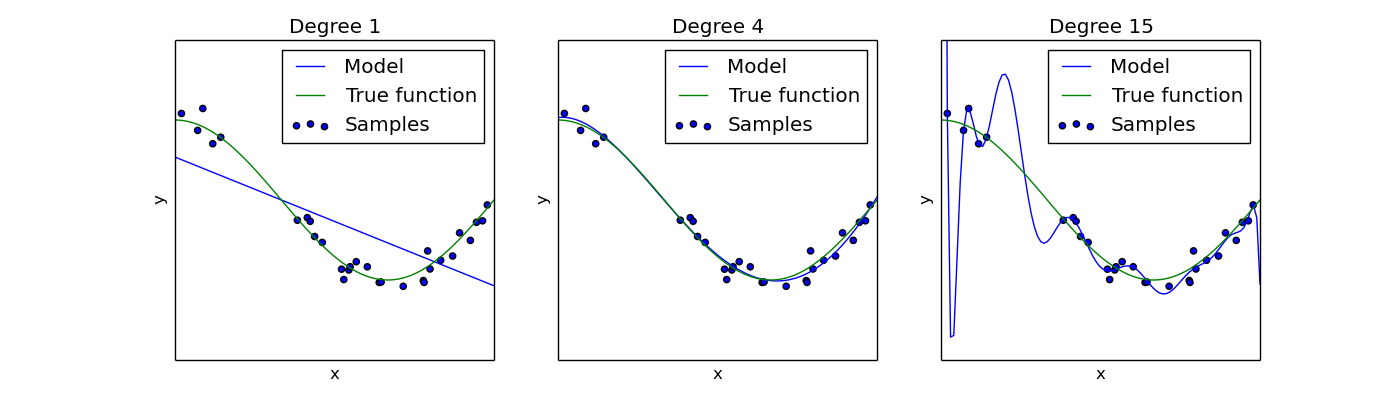

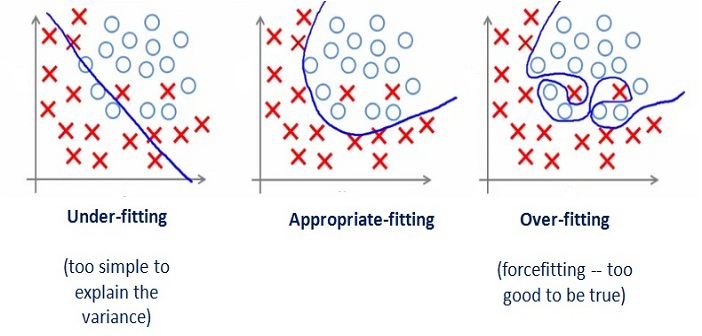

In [59]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy.random import normal
np.random.seed(67)

number_of_samples = 1000
X1 = normal(loc=0.0, scale=1, size=number_of_samples)
noise = normal(loc=0.0, scale=0.1, size=number_of_samples)
Y = 1 + X1  + noise



variables_list = [X1]
for i in range(100):
    variables_list.append(normal(loc=0.0, scale=0.1, size=number_of_samples))

X = np.column_stack(variables_list)

ntr = int(0.5 * X.shape[0])


model = linear_model.LinearRegression()
model.fit(X[:ntr,:], Y[:ntr])
Y_predicted = model.predict(X)
train_error = mean_squared_error(Y_predicted[:ntr], Y[:ntr])
val_error = mean_squared_error(Y_predicted[ntr:], Y[ntr:])
print('Training Error:  \t',train_error)
print('Validation Error:\t',mean_squared_error(Y_predicted[ntr:], Y[ntr:]))
print('diff:\t\t\t', val_error - train_error)



Training Error:  	 0.00814137838743
Validation Error:	 0.0131090273672
diff:			 0.0049676489798


# Реальные данные

## Регрессия

In [60]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [61]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
import statsmodels.api as sm
from scipy import stats

Y = data['PRICE']
X = data.drop(['PRICE'], axis=1)
X = sm.add_constant(X)
ols_model = sm.OLS(Y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 14 Apr 2018   Prob (F-statistic):          6.95e-135
Time:                        22:28:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

## Классификация

In [63]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [64]:
data = pd.DataFrame(breast_cancer.data[:,:28], columns = breast_cancer.feature_names[:28])
data['CANCER'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,CANCER
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0


In [65]:
import statsmodels.api as sm

Y = data['CANCER']
X = data.drop(['CANCER'], axis=1)
X = X.dropna()
X = sm.add_constant(X)
model = sm.Logit(Y, X)
results = model.fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.031840
         Iterations 28
                                 Results: Logit
Model:                     Logit                 No. Iterations:        28.0000 
Dependent Variable:        CANCER                Pseudo R-squared:      0.952   
Date:                      2018-04-14 22:28      AIC:                   94.2344 
No. Observations:          569                   BIC:                   220.2069
Df Model:                  28                    Log-Likelihood:        -18.117 
Df Residuals:              540                   LL-Null:               -375.72 
Converged:                 1.0000                Scale:                 1.0000  
--------------------------------------------------------------------------------
                          Coef.     Std.Err.    z    P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------------
const                      40.3018   55